# import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read file and manipulation

In [4]:
spam = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [5]:
spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)

In [7]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam.columns = ['label', 'text']

In [9]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
spam['label'] = encoder.fit_transform(spam['label'])
spam.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
X = spam['text']
y = spam['label']

# data split

In [13]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3900,) (1672,) (3900,) (1672,)


# modeling

In [15]:
#using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

#using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#using pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([("tfidf",tfidf),("model", model)])

In [16]:
pipe_model = pipe.fit(X_train, y_train)

In [17]:
pred = pipe_model.predict(X_test)

# evaluation

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [19]:
cm = confusion_matrix(pred, y_test)

In [20]:
cm

array([[1454,   75],
       [   0,  143]], dtype=int64)

In [21]:
print(accuracy_score(pred, y_test))

0.9551435406698564


In [22]:
print(recall_score(pred, y_test))

1.0


In [23]:
print(precision_score(pred, y_test))

0.6559633027522935


In [24]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1529
           1       0.66      1.00      0.79       143

    accuracy                           0.96      1672
   macro avg       0.83      0.98      0.88      1672
weighted avg       0.97      0.96      0.96      1672



# visualize the data, find common word

In [26]:
from wordcloud import WordCloud

In [29]:
def visualize_word(label):
    words = ""
    for word in spam[spam['label']==label]['text']:
        word = word.lower()
        words+= (word+' ')
    wordcloud = WordCloud(width = 700, height = 500).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show

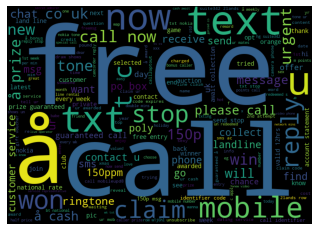

In [30]:
visualize_word(1)

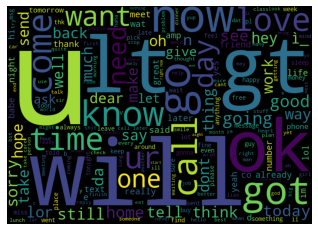

In [31]:
visualize_word(0)